In [ ]:
pip install streamlit

In [1]:
pip install streamlit_option_menu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 822.1/822.1 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 43.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.6 MB/s eta 0:00:00


In [2]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 25.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manyl

In [4]:
import streamlit as st
from streamlit_option_menu import option_menu
import easyocr
from PIL import Image
import pandas as pd
import numpy as np
import re
import io
import sqlite3

In [5]:
def Image_to_Text(path):
  input_image=Image.open(path)

  #CONVERT IMAGE TO ARRAY
  image_array=np.array(input_image)

  reader=easyocr.Reader(["en"])
  text=reader.readtext(image_array, detail=0)#To get only text data
  return text, input_image

In [6]:
text_image,input_image=Image_to_Text("/content/1.png")

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [ ]:
text_image,input_image=Image_to_Text("/content/2.png")

In [ ]:
text_image,input_image=Image_to_Text("/content/3.png")

In [ ]:
text_image,input_image=Image_to_Text("/content/4.png")

In [ ]:
text_image,input_image=Image_to_Text("/content/5.png")

In [24]:
def Text_Data(text):

  extext_dict={"Name":[],"Designation":[],"Company Name":[],"Contact":[],
             "Emailid":[],"Website":[],"Pincode":[],"Address":[]}
  extext_dict["Name"].append(text[0])
  extext_dict["Designation"].append(text[1])

  for i in range(2,len(text)):

    if text[i].startswith("+") or (text[i].replace("-","").isdigit()and "-" in text[i]):
      extext_dict["Contact"].append(text[i])

    elif "@" in text[i] and ".com" in text[i]:
      extext_dict["Emailid"].append(text[i])

    elif "WWW" in text[i] or "www" in text[i] or "Www" in text[i] or "wWw" in text[i] or "wwW" in text[i]:
      small=text[i].lower()
      extext_dict["Website"].append(small)

    elif "TamilNadu" in text[i] or "Tamil Nadu" in text[i] or text[i].isdigit():
      extext_dict["Pincode"].append(text[i])

    elif re.match(r'^[A-Za-z]',text[i]):
      extext_dict["Company Name"].append(text[i])

    else:
      remove_colon=re.sub(r'[,;]','',text[i])
      extext_dict["Address"].append(remove_colon)

  for key,value in extext_dict.items():
    if len(value)>0:
      concatenate="".join(value)
      extext_dict[key]=[concatenate]

    else:
      value="NA"
      extext_dict[key]=[value]

  return extext_dict

In [25]:
textdata=Text_Data(text_image)

In [26]:
df=pd.DataFrame(textdata)
df

,Name,Designation,Company Name,Contact,Emailid,Website,Pincode,Address
0,Selva,DATA MANAGER,selvadigitals,+123-456-7890+123-456-7891,hello@XYZ1.com,www xyzi.com,TamilNadu 600113,123 ABC St Chennai


In [ ]:
text_image

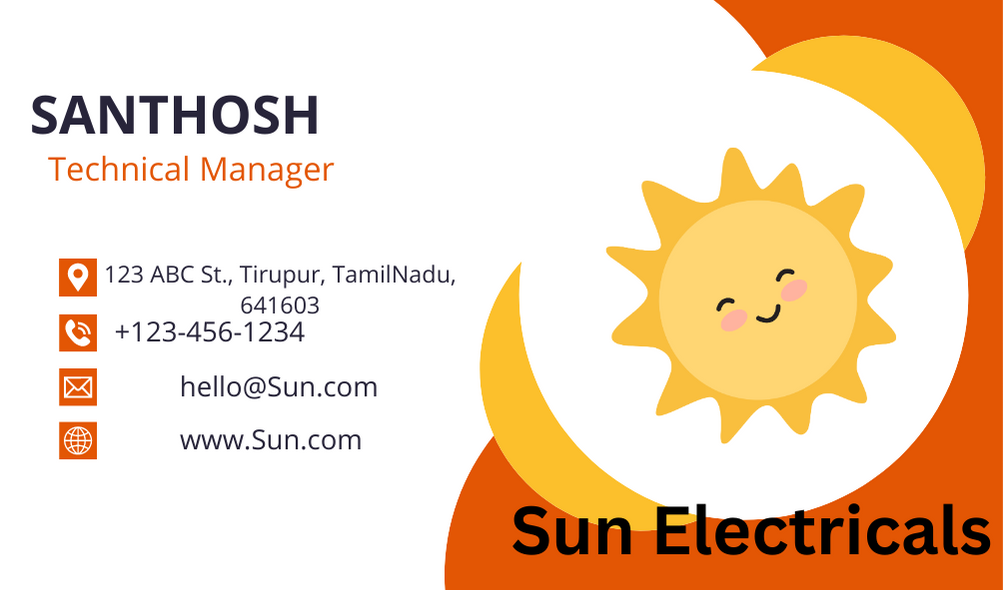

In [ ]:
input_image

In [27]:
#converting Image To Bytes

Image_bytes= io.BytesIO()
input_image.save(Image_bytes,format="PNG")

image_data=Image_bytes.getvalue()

#dictionary creating
data={"IMAGE":[image_data]}

df1=pd.DataFrame(data)

#Join 2 Data Frames
concatdf=pd.concat([df,df1],axis=1)
concatdf

,Name,Designation,Company Name,Contact,Emailid,Website,Pincode,Address,IMAGE
0,Selva,DATA MANAGER,selvadigitals,+123-456-7890+123-456-7891,hello@XYZ1.com,www xyzi.com,TamilNadu 600113,123 ABC St Chennai,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...


In [28]:
#database connection sql
mydb=sqlite3.connect("bizcard.db")
cursor=mydb.cursor()

#create table
create_table_query='''CREATE TABLE IF NOT EXISTS bizcard_details(name varchar(250),
                                                                designation varchar(250),
                                                                company_name varchar(250),
                                                                contact varchar(250),
                                                                emailid varchar(250),
                                                                website text,
                                                                address text,
                                                                pincode varchar(250),
                                                                image text)'''
cursor.execute(create_table_query)
mydb.commit()

In [29]:
#insert query
insert_query='''INSERT INTO bizcard_details(name,designation,company_name,contact,
                                            emailid,website,address,pincode,image)
                                            values(?,?,?,?,?,?,?,?,?)'''

datas=concatdf.values.tolist()[0]
cursor.execute(insert_query,datas)
mydb.commit()

In [32]:
#select query
select_query="SELECT * FROM bizcard_details"
cursor.execute(select_query)
table=cursor.fetchall()
mydb.commit()

table_df=pd.DataFrame(table,columns=("NAME","DESIGNATION","COMPANY","CONTACT",
                                     "EMAILID","WEBSITE","ADDRESS","PINCODE","IMAGE"))
table_df

,NAME,DESIGNATION,COMPANY,CONTACT,EMAILID,WEBSITE,ADDRESS,PINCODE,IMAGE
0,Selva,DATA MANAGER,selvadigitals,+123-456-7890+123-456-7891,hello@XYZ1.com,www xyzi.com,TamilNadu 600113,123 ABC St Chennai,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...
1,REVANTH,Marketing Executive,FamilyRestaurant,+91-456-1234,hello@CHRISTMAS.com,www.christmas.com,"123 ABC St,, HYDRABAD, TamilNadu;600001",NA,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...
2,Selva,DATA MANAGER,selvadigitals,+123-456-7890+123-456-7891,hello@XYZ1.com,www xyzi.com,123 ABC St Chennai,TamilNadu 600113,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...
3,Amit kumar,CEO & FOUNDER,"GLOBALINSURANCESt ,",123-456-7569,hello@global.com,www.global.com,"Erode, TamilNadu",123 global,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...
4,Selva,DATA MANAGER,selvadigitals,+123-456-7890+123-456-7891,hello@XYZ1.com,www xyzi.com,TamilNadu 600113,123 ABC St Chennai,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...


In [37]:
#select query

mydb=sqlite3.connect("bizcard.db")
cursor=mydb.cursor()

select_query="SELECT NAME FROM bizcard_details"
cursor.execute(select_query)
table1=cursor.fetchall()
mydb.commit()

names=[]

for i in table1:
  names.append(i[0])

names

['DATA MANAGER',
 'Marketing Executive',
 'DATA MANAGER',
 'CEO & FOUNDER',
 'DATA MANAGER']

In [38]:
%%writefile Bizcardstream.py






import streamlit as st
from streamlit_option_menu import option_menu
import easyocr
from PIL import Image
import pandas as pd
import numpy as np
import re
import io
import sqlite3

def Image_to_Text(path):
  input_image=Image.open(path)

  #CONVERT IMAGE TO ARRAY
  image_array=np.array(input_image)

  reader=easyocr.Reader(["en"])
  text=reader.readtext(image_array, detail=0)#To get only text data
  return text, input_image

def Text_Data(text):

  extext_dict={"Name":[],"Designation":[],"Company Name":[],"Contact":[],
             "Emailid":[],"Website":[],"Address":[],"Pincode":[]}
  extext_dict["Name"].append(text[0])
  extext_dict["Designation"].append(text[1])

  for i in range(2,len(text)):

    if text[i].startswith("+") or (text[i].replace("-","").isdigit()and "-" in text[i]):
      extext_dict["Contact"].append(text[i])

    elif "@" in text[i] and ".com" in text[i]:
      extext_dict["Emailid"].append(text[i])

    elif "WWW" in text[i] or "www" in text[i] or "Www" in text[i] or "wWw" in text[i] or "wwW" in text[i]:
      small=text[i].lower()
      extext_dict["Website"].append(small)

    elif "TamilNadu" in text[i] or "Tamil Nadu" in text[i] or text[i].isdigit():
      extext_dict["Pincode"].append(text[i])

    elif re.match(r'^[A-Za-z]',text[i]):
      extext_dict["Company Name"].append(text[i])

    else:
      remove_colon=re.sub(r'[,;]','',text[i])
      extext_dict["Address"].append(remove_colon)

  for key,value in extext_dict.items():
    if len(value)>0:
      concatenate="".join(value)
      extext_dict[key]=[concatenate]

    else:
      value="NA"
      extext_dict[key]=[value]

  return extext_dict

#streamlit code

st.set_page_config(layout="wide")
st.title("EXTRACTING BUSINESS CARD DATA WITH OCR")

with st.sidebar:

  select=option_menu("Main Menu",["Home","Upload & Modifying","Delete"])
if select=="Home":
  st.markdown("### :blue[**Technologies Used :**] Python,easy OCR, Streamlit, SQL, Pandas")



  st.write(
            "### :green[**About :**] Bizcard is a Python application designed to extract information from business cards.")
  st.write(
            '### The main purpose of Bizcard is to automate the process of extracting key details from business card images, such as the name, designation, company, contact information, and other relevant data. By leveraging the power of OCR (Optical Character Recognition) provided by EasyOCR, Bizcard is able to extract text from the images.')

elif select=="Upload & Modifying":
  img=st.file_uploader("Upload the Business Card",type=["png","jpg","jpeg"])

  if img is not None:
    st.image(img,width=500)

    text_image,input_image= Image_to_Text(img)
    text_dict=Text_Data(text_image)

    if text_dict:
      st.success("IMAGE IS CONVERTED TO TEXT DATA SUCCESSFULLY",icon="✅")

    df=pd.DataFrame(text_dict)

    #converting Image To Bytes

    Image_bytes= io.BytesIO()
    input_image.save(Image_bytes,format="PNG")

    image_data=Image_bytes.getvalue()

    #dictionary creating
    data={"IMAGE":[image_data]}

    df1=pd.DataFrame(data)

    #Join 2 Data Frames
    concatdf=pd.concat([df,df1],axis=1)
    st.dataframe(concatdf)

    button1=st.button("Save",use_container_width=True)

    if button1:
      #database connection sql
      mydb=sqlite3.connect("bizcard.db")
      cursor=mydb.cursor()

      #create table
      create_table_query='''CREATE TABLE IF NOT EXISTS bizcard_details(name varchar(250),
                                                                      designation varchar(250),
                                                                      company_name varchar(250),
                                                                      contact varchar(250),
                                                                      emailid varchar(250),
                                                                      website text,
                                                                      address text,
                                                                      pincode varchar(250),
                                                                      image text)'''
      cursor.execute(create_table_query)
      mydb.commit()

      #insert query
      insert_query='''INSERT INTO bizcard_details(name,designation,company_name,contact,
                                                  emailid,website,address,pincode,image)
                                                  values(?,?,?,?,?,?,?,?,?)'''

      datas=concatdf.values.tolist()[0]
      cursor.execute(insert_query,datas)
      mydb.commit()

      st.success("SAVED SUCCESSFULLY",icon="✅")

  method=st.radio("Select the Method",["None","Preview","Modify"])

  if method=="None":
    st.write("")

  if method=="Preview":

    #database connection sql
    mydb=sqlite3.connect("bizcard.db")
    cursor=mydb.cursor()
    #select query
    select_query="SELECT * FROM bizcard_details"
    cursor.execute(select_query)
    table=cursor.fetchall()
    mydb.commit()

    table_df=pd.DataFrame(table,columns=("NAME","DESIGNATION","COMPANY","CONTACT",
                                        "EMAILID","WEBSITE","ADDRESS","PINCODE","IMAGE"))
    st.dataframe(table_df)

  elif method=="Modify":

    #database connection sql
    mydb=sqlite3.connect("bizcard.db")
    cursor=mydb.cursor()
    #select query
    select_query="SELECT * FROM bizcard_details"
    cursor.execute(select_query)
    table=cursor.fetchall()
    mydb.commit()

    table_df=pd.DataFrame(table,columns=("NAME","DESIGNATION","COMPANY","CONTACT",
                                        "EMAILID","WEBSITE","ADDRESS","PINCODE","IMAGE"))


    col1,col2=st.columns(2)
    with col1:
      selected_name=st.selectbox("Select the Name",table_df["NAME"])

    df3=table_df[table_df["NAME"]==selected_name]


    df4=df3.copy()


    col3,col4=st.columns(2)
    with col3:
      modif_name=st.text_input("Name",df3["NAME"].unique()[0])
      modif_desig=st.text_input("Designation",df3["DESIGNATION"].unique()[0])
      modif_company=st.text_input("Company_Name",df3["COMPANY"].unique()[0])
      modif_contact=st.text_input("Contact",df3["CONTACT"].unique()[0])
      modif_emailid=st.text_input("Emailid",df3["EMAILID"].unique()[0])
      df4["NAME"],df4["DESIGNATION"],df4["COMPANY"],df4["CONTACT"],df4["EMAILID"]=modif_name,modif_desig,modif_company,modif_contact,modif_emailid

    with col4:
      modif_website=st.text_input("Website",df3["WEBSITE"].unique()[0])
      modif_address=st.text_input("Address",df3["ADDRESS"].unique()[0])
      modif_image=st.text_input("Image",df3["IMAGE"].unique()[0])
      modif_pincode=st.text_input("Pincode",df3["PINCODE"].unique()[0])
      df4["WEBSITE"]=modif_website
      df4["ADDRESS"]=modif_address
      df4["IMAGE"]=modif_image
      df4["PINCODE"]=modif_pincode

    st.dataframe(df4)

    col1,col2=st.columns(2)
    with col1:
      button3=st.button("Modify the Text",use_container_width=True)

    if button3:

      mydb=sqlite3.connect("bizcard.db")
      cursor=mydb.cursor()

      cursor.execute(f"DELETE FROM bizcard_details WHERE NAME ='{selected_name}'")
      mydb.commit()

      #insert query
      insert_query='''INSERT INTO bizcard_details(name,designation,company_name,contact,
                                                  emailid,website,address,pincode,image)
                                                  values(?,?,?,?,?,?,?,?,?)'''

      datas=df4.values.tolist()[0]
      cursor.execute(insert_query,datas)
      mydb.commit()

      st.success("MODIFIED SUCCESSFULLY")


elif select=="Delete":

    #database connection sql
    mydb=sqlite3.connect("bizcard.db")
    cursor=mydb.cursor()


    col1,col2=st.columns(2)
    with col1:

      select_query="SELECT NAME FROM bizcard_details"
      cursor.execute(select_query)
      table1=cursor.fetchall()
      mydb.commit()

      names=[]

      for i in table1:
        names.append(i[0])

      name_select=st.selectbox("choose the name",names)


    with col2:

      select_query=f"SELECT DESIGNATION FROM bizcard_details WHERE NAME= '{name_select}'"
      cursor.execute(select_query)
      table2=cursor.fetchall()
      mydb.commit()

      designations=[]

      for j in table2:
        designations.append(j[0])

      designation_select=st.selectbox("choose the designation",designations)

    if name_select and designation_select:

      col1,col2,col3=st.columns(3)

      with col1:
        st.write(f"Selected Name: {name_select}")
        st.write("")
        st.write("")
        st.write("")
        st.write(f"Selected Designation: {designation_select}")


      with col2:
        st.write("")
        st.write("")
        st.write("")
        st.write("")

      remove=st.button("Delete",use_container_width=True)

      if remove:

        cursor.execute(f"DELETE FROM bizcard_details WHERE NAME='{name_select}' AND DESIGNATION='{designation_select}'")

        mydb.commit()

        st.warning("Deleted", icon="⚠️")




Overwriting Bizcardstream.py


In [39]:
!wget -q -O - ipv4.icanhazip.com

34.145.55.207


In [ ]:
!streamlit run Bizcardstream.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.145.55.207:8501

npx: installed 22 in 2.402s
your url is: https://eager-games-cut.loca.lt
2024-04-24 18:09:21.441 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 584, in _run_script
    exec(code, module.__dict__)
  File "/content/Bizcardstream.py", line 264, in <module>
    if name_select and designation_select:
NameError: name 'name_select' is not defined
2024-04-24 18:10:29.579 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 584, in _run_script
    exec(code, module.__dict__)
  File "/content/Bizcardstream.py", line 264, in <module>
    if name_select and designation_select:
NameError: name 'name_select' is not defined
2024-04-24 18:10:33.